In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
aqi_df = pd.read_csv("C:/Users/Jaspreet Singh/Desktop/DS_Projects/1a. AQI Prediction/2. Data Preparation/Lvl -2 Missing Value Detection and Treatment/AQI_TS_Daily.csv")

In [7]:
aqi_df.shape

(2375, 11)

In [8]:
aqi_df.head(3)

,timestamp,PM2.5,PM10,NO2,SO2,CO,Temperature_in_°C,Wind_Speed_in_Kmph,Rel_Humidity,Dew_Point_in_°C,Atmospheric_Pressure_in_mb
0,2015-06-01,120.833333,224.750000,81.458333,15.6250,33.583333,31.338542,13.770833,0.318255,11.872396,1002.981771
1,2015-06-02,97.916667,120.833333,83.291667,10.8750,34.875000,32.088542,10.901042,0.334323,12.796875,1004.848958
2,2015-06-03,146.000000,136.708333,109.500000,8.1875,40.666667,28.645833,13.708333,0.487292,16.489583,1005.708333


In [14]:
aqi_df['timestamp'] = pd.to_datetime(aqi_df['timestamp'])
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   2375 non-null   datetime64[ns]
 1   PM2.5                       2375 non-null   float64       
 2   PM10                        2375 non-null   float64       
 3   NO2                         2375 non-null   float64       
 4   SO2                         2375 non-null   float64       
 5   CO                          2375 non-null   float64       
 6   Temperature_in_°C           2375 non-null   float64       
 7   Wind_Speed_in_Kmph          2375 non-null   float64       
 8   Rel_Humidity                2375 non-null   float64       
 9   Dew_Point_in_°C             2375 non-null   float64       
 10  Atmospheric_Pressure_in_mb  2375 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 204.2 KB

In [15]:
# Converting Data into Monthly for Better Accuracy
aqi_mon_df = aqi_df.resample('M', on='timestamp').mean()

In [16]:
aqi_mon_df.shape

(78, 10)

In [17]:
aqi_mon_df.head()

,PM2.5,PM10,NO2,SO2,CO,Temperature_in_°C,Wind_Speed_in_Kmph,Rel_Humidity,Dew_Point_in_°C,Atmospheric_Pressure_in_mb
timestamp,,,,,,,,,,
2015-06-30,177.463876,170.325424,81.515110,9.422584,47.941932,32.868218,11.607878,0.484187,19.193685,1001.167627
2015-07-31,102.878805,100.240629,64.588702,9.668520,60.815132,29.938797,11.008737,0.738485,24.318543,1000.509424
2015-08-31,119.393060,107.938090,64.747991,11.195601,57.419467,29.968477,9.091209,0.755271,24.859144,1003.208165
2015-09-30,151.437017,153.787842,57.099497,15.877342,60.953000,30.434701,10.558377,0.588812,20.894032,1006.882639
2015-10-31,242.496158,215.361318,97.951035,23.564202,69.596576,27.432906,7.712195,0.523990,15.888627,1012.082591


## PM2.5 Component Analysis

<AxesSubplot:xlabel='timestamp'>

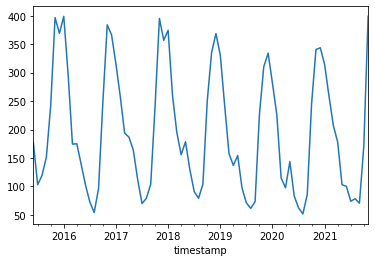

In [19]:
aqi_mon_df['PM2.5'].plot(label = "PM2.5 Monthly Time Series")

### Let us Decompose our time series to see Seasonality, Trend and Noise

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

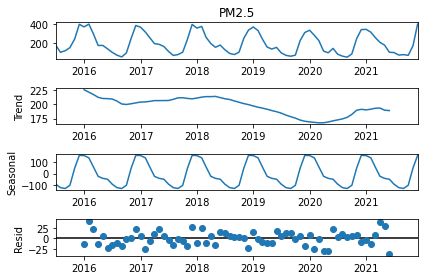

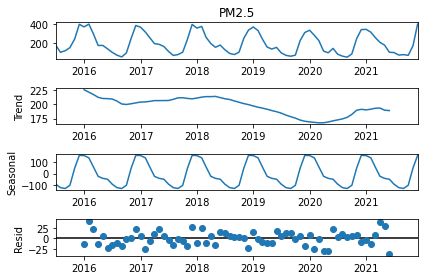

In [24]:
# Decompose and plot using additive approach
add_decomposed = seasonal_decompose(aqi_mon_df['PM2.5'], model='additive', period = 12)
add_decomposed.plot()

## Trend clearly gives some interesting insights - Pandemic and Lockdown led to low pollution overall in 2020. Also it is non linear.
## Seasonality was already visible from time series
## Noise shows November to be unpredictable visually.


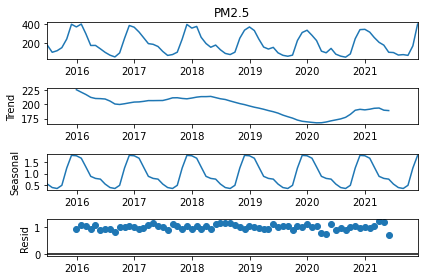

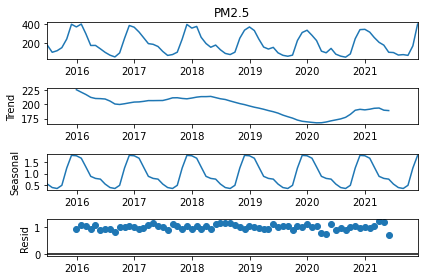

In [25]:
# Decompose and plot using multiplicative approach
add_decomposed = seasonal_decompose(aqi_mon_df['PM2.5'], model='multiplicative', period = 12)
add_decomposed.plot()

### Data seems to follow multiplicative time series as Noise is uniform